# sklearn

可以看到库的算法主要有四类：分类，回归，聚类，降维。其中：

- 常用的回归：线性、决策树、SVM、KNN ；集成回归：随机森林、Adaboost、GradientBoosting、Bagging、ExtraTrees
- 常用的分类：线性、决策树、SVM、KNN，朴素贝叶斯；集成分类：随机森林、Adaboost、GradientBoosting、Bagging、ExtraTrees
- 常用聚类：k均值（K-means）、层次聚类（Hierarchical clustering）、DBSCAN
- 常用降维：LinearDiscriminantAnalysis、PCA


# 数据预处理preprocessing

## 标准化
- 在机器学习算法的目标函数(例如SVM的RBF内核或线性模型的l1和l2正则化)，许多学习算法中目标函数的基础都是假设所有的特征都是零均值并且具有同一阶数上的方差。如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们说期望的那样，从其他特征中学习。

sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [10]:
import numpy as np
from  sklearn.preprocessing import StandardScaler
X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
scaler = StandardScaler()
print(scaler.fit(X_train))
#================返回值提取
print(scaler.mean_)
print(scaler.transform(X_train))


StandardScaler(copy=True, with_mean=True, with_std=True)
[1.         0.         0.33333333]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


## 生成多项式特征
-通常，考虑输入数据的非线性特征会增加模型的复杂性。多项式特征是一种简单而通用的方法，它可以获取特征的高阶和相互作用项。它在PolynomialFeatures以下位置实现：

 sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

poly = PolynomialFeatures(2)
poly.fit_transform(X)

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## 数据非线性变换

-  PowerTransformer 目前提供两个这样的幂变换,Yeo-Johnson transform 和 the Box-Cox transform。
- sklearn.preprocessing.PowerTransformer（method = 'yeo-johnson'，*，standardize = True，copy = True）

In [15]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
pt.fit_transform(X_lognormal)
#使用Box-Cox将样本从对数正态分布映射到正态分布

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612414],
       [ 0.69420009, -0.84857822,  0.10051454]])

# 回归分析

-https://scikit-learn.org/stable/
- 中文介绍 https://www.cntofu.com/book/170/readme.html

## 线性回归分析

$$ \hat{y}(w,x)= w_{0} + w_{1} x_{1} +\ldots+ w_{p} x_{p} $$

In [126]:
from sklearn import linear_model
# 线性模型： 最小二乘法、岭回归、Lasso（梯度下降）、弹性网、最小角回归、正交匹配追踪
# 广义线性模型           #逻辑回归
#随机梯度下降           #感知器
#稳健回归             #多项式回归

import pandas as pd

1. **普通最小二乘法（Ordinary least squares）：**

以模型预测值与样本观测值的残差平方和最小作为优化目标。

2. **岭回归（Ridge regression）** 

在普通最小二乘法的基础上增加惩罚因子以减少共线性的影响，以带惩罚项（L2正则化）的残差平方和最小作为优化目标。在指标中同时考虑了较好的学习能力以及较小的惯性能量，以避免过拟合而导致模型泛化能力差。

3. **Lasso 回归（Least absolute shrinkage and selection operator）**

在普通最小二乘法的基础上增加绝对值偏差作为惩罚项（L1正则化）以减少共线性的影响，在拟合广义线性模型的同时进行变量筛选和复杂度调整，适用于稀疏系数模型。

4. **多元 Lasso 回归（Multi-task Lasso）**

用于估计多元回归稀疏系数的线性模型。注意不是指多线程或多任务，而是指对多个输出变量筛选出相同的特征变量（也即回归系数整列为 0，因此该列对应的输入变量可以被删除）。

5. **弹性网络回归（Elastic-Net）**

引入L1和L2范数正则化而构成带有两种惩罚项的模型，相当于岭回归和 Lasso 回归的组合。

6. **Multi-task Elastic-Net**

用于估计多元回归稀疏系数线性模型的弹性网络回归方法。

7. **最小角回归算法（Least Angle Regression）**

结合前向梯度算法和前向选择算法，在保留前向梯度算法的精确性的同时简化迭代过程。每次选择都加入一个与相关度最高的自变量，最多 m步就可以完成求解。特别适合于特征维度远高于样本数的情况。

8. **LARS Lasso** 使用最小角回归算法求解 Lasso模型。

9. **正交匹配追踪法（Orthogonal Matching Pursuit）**

用于具有非零系数变量数约束的近似线性模型。在分解的每一步进行正交化处理，选择删除与当前残差最大相关的列，反复迭代达到所需的稀疏程度。

10. **贝叶斯回归（Bayesian Regression）**

用贝叶斯推断方法求解的线性回归模型，具有贝叶斯统计模型的基本性质，可以求解权重系数的概率密度函数。可以被用于观测数据较少但要求提供后验分布的问题，例如对物理常数的精确估计；也可以用于变量筛选和降维。

11. **逻辑回归（Logistic Regression）**
逻辑回归是一种广义线性模型，研究顺序变量或属性变量作为输出的问题，实际是一种分类方法。通过线性模型加Sigmoid映射函数，将线性模型连续型输出变换为离散值。常用于估计某种事物的可能性，如寻找危险因素、预测发病概率、判断患病概率，是流行病学和医学中最常用的分析方法。
12. **广义线性回归（Generalized Linear Regression）**
广义线性回归是线性回归模型的推广，实际上是非线性模型。通过单调可微的联结函数，建立输出变量与输入变量的线性关系，将问题简洁直接地转化为线性模型来处理。
13. **随机梯度下降（Stochastic Gradient Descent）**
梯度下降是一种基于搜索的最优化方法，用梯度下降法来求损失函数最小时的参数估计值，适用样本数（和特征数）非常非常大的情况。随机梯度下降法在计算下降方向时，随机选一个数据进行计算，而不是扫描全部训练数据集，加快了迭代速度。
14. **感知机（Perceptron）感知机（Perceptron）** 感知机是一种适合大规模学习的简单分类算法。训练速度比SGD稍快，并且产生的模型更稀疏。
15. **被动攻击算法（Passive Aggressive Algorithms）**
被动攻击算法是一类用于大规模学习的算法。
16. **鲁棒性回归（Robustness regression）**

鲁棒性回归的目的是在存在损坏数据的情况下拟合回归模型，如存在异常值或错误的情况。
17. **多项式回归（Polynomial regression）**
多项式回归通过构造特征变量的多项式来扩展简单的线性回归模型。例如将特征变量组合成二阶多项式，可以将抛物面拟合到数据中，从而具有更广泛的灵活性和适应性。

## 加载数据集

### 导入sklearn 模块内的数据

In [219]:
import sklearn
from sklearn.datasets import load_boston
#装载数据集
boston = load_boston()

#显示元信息
print (boston.keys())
print('*-*'*30)
print (boston.feature_names)
print('*-*'*30)
#print (boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [68]:
#方法一:以数据原来的格式--数组的形式
X = boston.data
y = boston.target
print(type(X),type(y))

# 方法二：
Bos_X, Bos_y = sklearn.datasets.load_boston(return_X_y=True)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [218]:
#方法三：以数据框的形式
#创建DataFrame
bos = pd.DataFrame(boston.data)#特征
#print (bos.head())
print('='*30,'设定各个属性列的名称','='*30)

bos.columns = boston.feature_names
#print (bos.head())

print('='*30,'增加价格PRICE列','='*30)
#print (boston.target[:5])
bos['PRICE'] = boston.target
#print (bos.head())
print('='*40,'数据信息')
bos.info()
bos.isnull().sum()

============================== 设定各个属性列的名称 ==============================
============================== 增加价格PRICE列 ==============================
======================================== 数据信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [105]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [109]:
corrboston = bos.corr()
#corrboston
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()    #设置画图空间为 Seaborn 默认风格
plt.figure(figsize=(10,10))    #设置画布
#sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()

<Figure size 720x720 with 0 Axes>

In [145]:
names=list(boston.feature_names)
x_data = bos[names] # 导入所有特征变量
y_data = bos['PRICE'] # 导入目标值（房价）


### 数据划分

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split ( x_data, y_data, test_size=0.33, random_state=5) 
# 划分对象可以是lists, numpy arrays, scipy-sparsematrices or pandas dataframes
# 更多内容参见 help(train_test_split)
print (X_train.shape )
print (X_test.shape )
print (Y_train.shape )
print (Y_test.shape )


(339, 13)
(167, 13)
(339,)
(167,)


names =a
plt.figure(figsize=(18,10))

for i in range(13):
    plt.subplot(4,4,i+1)
    plt.scatter(x_data.values[:,i],y_data,s = 5)    #.values将DataFrame对象X_df转成ndarray数组
    plt.xlabel(names[i])
    plt.ylabel('Price')
    plt.title(str(i+1)+'. '+names[i]+' - Price')  
#plt.title('每个变量与房价的散点图')    
plt.tight_layout()

plt.show()

## 普通最小二乘法--sklearn

### 拟合模型

实现的语句：
LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

- fit_intercept设置为False时，将忽略此参数。如果为True，则将在回归之前通过减去均值并除以l2-范数来对回归变量X进行归一化。

LinearRegression() 类的参数不多，通常几乎不需要设置。
　
LinearRegression() 类的主要方法：

- fit(X,y[,sample_weight])　　用样本集（X, y）训练模型。sample_weight 为每个样本设权重，默认None。
- get_params([deep])　　获取模型参数。注意不是指模型回归系数，而是指fit_intercept,normalize等参数。
- predict(X)　　用训练的模型预测数据集 X 的输出。即可以对训练样本给出模型输出结果，也可以对测试样本给出预测结果。
- score(X,y[,sample_weight])　　R2 判定系数，是常用的模型评价指标。

In [176]:
from sklearn import linear_model
#建立线性回归模型，并将变量带入模型进行训练。
regr = linear_model.LinearRegression()

model = regr.fit( X_train, Y_train)

print('回归截距项:',model.intercept_)

print('回归系数:',model.coef_)

#显示各个变量的系数
coef = pd.DataFrame( zip(boston.feature_names, model.coef_), columns=['features', 'OLS estimated coefficients'])
print(coef)


回归截距项: 32.8589326340861
回归系数: [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]
   features  Linear model estimated coefficients
0      CRIM                            -0.156381
1        ZN                             0.038549
2     INDUS                            -0.025063
3      CHAS                             0.786440
4       NOX                           -12.946912
5        RM                             4.002689
6       AGE                            -0.011602
7       DIS                            -1.368288
8       RAD                             0.341757
9       TAX                            -0.013515
10  PTRATIO                            -0.988866
11        B                             0.012059
12    LSTAT                            -0.472644


### 模型评估

In [166]:
from sklearn.metrics import r2_score
y_pred =regr.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7551
训练集的均方误差：19.5468
训练集的平均绝对值误差：3.1219
训练集的中位绝对值误差：2.3422


 **scikit-learn.metrics里各种指标简介**

1. 简单介绍参见：https://www.cnblogs.com/mdevelopment/p/9456486.html

2. 详细介绍参见：https://www.cnblogs.com/harvey888/p/6964741.html

3. 官网介绍：https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 绘制图像

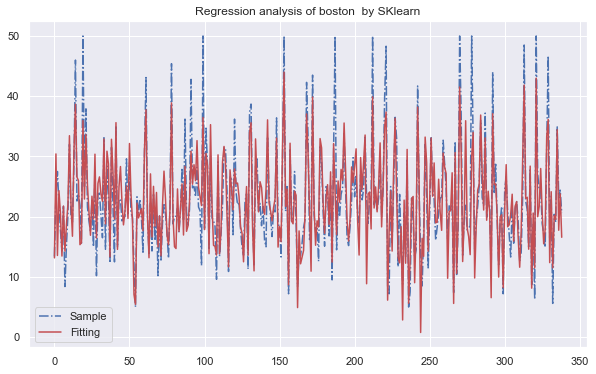

In [171]:

# 绘图：原始数据点，拟合曲线
fig, ax = plt.subplots(figsize=(10, 6))  # YouCans, XUPT
ax.plot(range(len(Y_train)), Y_train, 'b-.', label='Sample')  # 样本数据
ax.plot(range(len(Y_train)), y_pred, 'r-', label='Fitting')  # 拟合数据
ax.legend(loc='best')  # 显示图例
plt.title('Regression analysis of boston  by SKlearn')
#plt.xlabel('period')
#plt.ylabel('sales')
plt.show()

## 普通最小二乘--Statsmodels

statsmodels主要包括如下子模块：

- 回归模型：线性回归，广义线性模型，稳健的线性模型，线性混合效应模型等等。

- 方差分析（ANOVA）。

- 时间序列分析：AR，ARMA，ARIMA，VAR和其它模型。

- 非参数方法： 核密度估计，核回归。

- 统计模型结果可视化。
**比较：statsmodels更关注统计推断，提供不确定估计和参数p-value。相反的，scikit-learn注重预测。**

In [229]:
import statsmodels.api as sm #横截面模型和方法
#https://www.statsmodels.org/stable/api.html

OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)

- endog、 exog: array 

In [231]:
from sklearn.model_selection import train_test_split
X = boston.data
y = boston.target

X_train, X_test, Y_train, Y_test =train_test_split (X, y, test_size=0.33) 
X_train=sm.add_constant(X_train)
model_s=sm.OLS(Y_train,X_train)
results = model_s.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     68.53
Date:                Wed, 19 May 2021   Prob (F-statistic):           7.87e-85
Time:                        01:49:49   Log-Likelihood:                -1013.8
No. Observations:                 339   AIC:                             2056.
Df Residuals:                     325   BIC:                             2109.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.9010      6.182      7.101      0.0

In [250]:
from sklearn.metrics import r2_score
y_pred =results.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7327
训练集的均方误差：23.1732
训练集的平均绝对值误差：3.4139
训练集的中位绝对值误差：2.6438


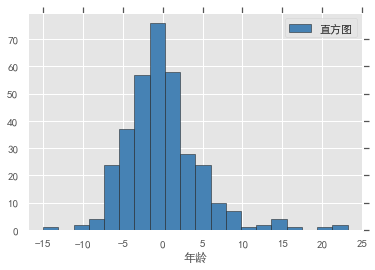

In [260]:
residual = results.resid
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题
plt.style.use( 'ggplot')

plt.hist(residual , bins = 20, color = 'steelblue', edgecolor = 'k',label = '直方图')
         # 绘图数据# 指定直方图的条形数为20个
         # 指定填充色 # 指定直方图的边界色 # 为直方图呈现标签
# 去除图形顶部边界和右边界的刻度
plt.tick_params(top= 'off', right= 'off')
# 显示图例
plt.legend()
# 显示图形
plt.xlabel("年龄") 
plt.show()

In [248]:
#、一般情况下，科学研究会建议VIF=10设置为threshold，任何变量的VIF>10,会被认为需
#要重新检视该变量,可能存在多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= []
for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(exog=X_train,exog_idx=i))
print(VIF)

name1= list(boston.feature_names)
name1=['const']+name1
pd.DataFrame({'coef_name':name1,'VIF':np.round(VIF,3)})


[536.065574409438, 1.7228520755029013, 2.1963002172956156, 3.9339125495676006, 1.148262541468531, 4.231721232142396, 1.7820102520016192, 3.0588201969630613, 3.733431175770859, 7.728848661331716, 9.558848316852998, 1.8388693184173543, 1.473718149984518, 2.693406801085234]


,coef_name,VIF
0,const,536.066
1,CRIM,1.723
2,ZN,2.196
3,INDUS,3.934
4,CHAS,1.148
5,NOX,4.232
6,RM,1.782
7,AGE,3.059
8,DIS,3.733
9,RAD,7.729


## 岭回归

Ridge（alpha = 1.0，*，fit_intercept = True，normalize = False，copy_X = True，max_iter = None，tol = 0.001，solver= 'auto'，random_state = None）

 目标函数 ||y - Xw||^2_2 + alpha * ||w||^2_2


In [179]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
model1=clf.fit(X_train, Y_train)
#显示各个变量的系数
coef1 = pd.DataFrame( zip(boston.feature_names, model1.coef_), columns=['features', 'Ridge estimated coefficients'])
print(coef1)

   features  Ridge estimated coefficients
0      CRIM                     -0.152847
1        ZN                      0.039770
2     INDUS                     -0.051566
3      CHAS                      0.634287
4       NOX                     -6.357149
5        RM                      4.009259
6       AGE                     -0.017092
7       DIS                     -1.272979
8       RAD                      0.327888
9       TAX                     -0.014335
10  PTRATIO                     -0.920537
11        B                      0.011868
12    LSTAT                     -0.484499


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


CV 方法选择调节参数


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


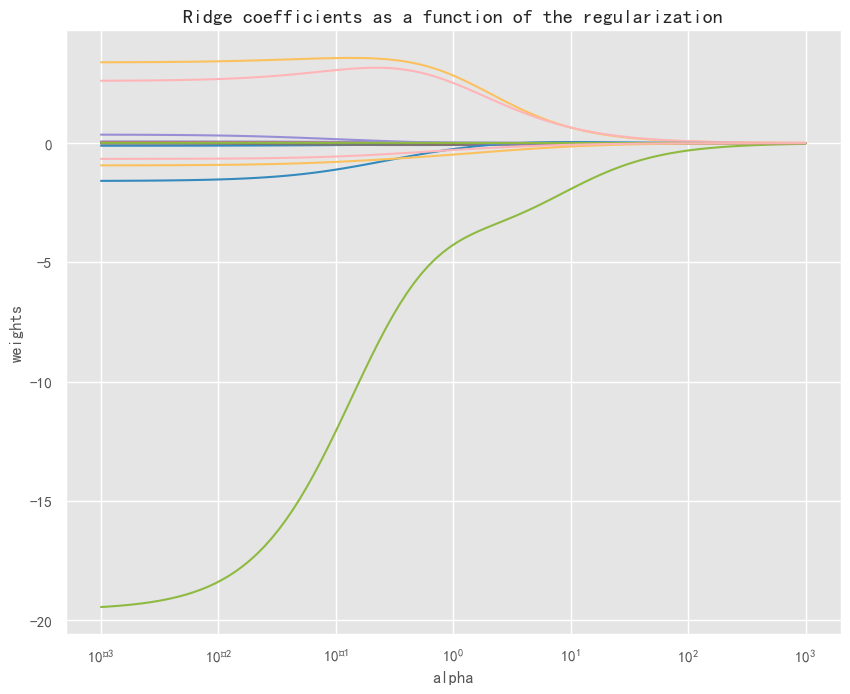

In [277]:
print('CV 方法选择调节参数')
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题

alphas = 10**np.linspace(-3,3,100)

ridge_cofficients = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(X_train, Y_train)
    ridge_cofficients.append(ridge.coef_)
#print(ridge_cofficients)
p1 = plt.figure(figsize=(10,8),dpi=100)## 确定画布大小
ax = plt.subplot(1,1,1)

ax.plot(alphas, ridge_cofficients)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [303]:
#为了找到最佳的lambda值,我们采用交叉验证方法
#岭回归模型的交叉验
alphas = list(10**np.linspace(-3,3,100))
from sklearn.linear_model import RidgeCV
#ridge_cv= RidgeCV(alphas = alphas, normalize=True, scoring='mean-squared_error, cv = 10)

ridgecv=RidgeCV(alphas=alphas,cv=5)
clf=ridgecv.fit(X_train,Y_train)
#取出最佳的lambda值ridge best alpha =ridge cv.alpha
ridge_best_alpha=ridgecv.alpha_
ridge_best_alpha

rcvb=Ridge(alpha=ridge_best_alpha)
clf1=rcvb.fit(X_train,Y_train)

In [306]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=ridge_best_alpha)
modelr=clf.fit(X_train, Y_train)
#显示各个变量的系数
coefr = pd.DataFrame( zip(boston.feature_names, model1.coef_), columns=['features', 'Ridge estimated coefficients+CV'])
print(coef1)

   features  Ridge estimated coefficients
0      CRIM                     -0.152847
1        ZN                      0.039770
2     INDUS                     -0.051566
3      CHAS                      0.634287
4       NOX                     -6.357149
5        RM                      4.009259
6       AGE                     -0.017092
7       DIS                     -1.272979
8       RAD                      0.327888
9       TAX                     -0.014335
10  PTRATIO                     -0.920537
11        B                      0.011868
12    LSTAT                     -0.484499


In [307]:
from sklearn.metrics import r2_score
y_pred =modelr.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7327
训练集的均方误差：23.1762
训练集的平均绝对值误差：3.4077
训练集的中位绝对值误差：2.6174


In [ ]:
训练集的可决系数：0.7327
训练集的均方误差：23.1732
训练集的平均绝对值误差：3.4139
训练集的中位绝对值误差：2.6438

## Lasso

Lasso（alpha = 1.0，*，fit_intercept = True，normalize = False，precompute = False，copy_X = True，max_iter = 1000，tol = 0.0001，warm_start = False，正= False，random_state = None，selection='cyclic')

- (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [26]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
lasso_fit=reg.fit(X_train,Y_train)
lasso_fit.coef_
lasso_fit.score(X_train,Y_train)

0.7306693217097966

lasso_path(X, y, \*, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, \**params)

Computing regularization path using the lasso...


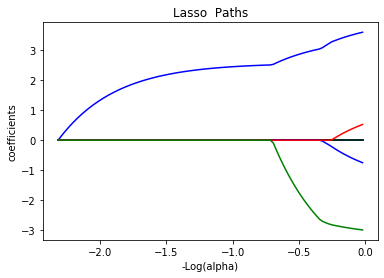

In [18]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path
import sklearn
from sklearn.datasets import load_boston
#装载数据集
boston = load_boston()

#方法一:以数据原来的格式--数组的形式
X = boston.data
y = boston.target
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split ( X, y, test_size=0.33) 

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)


# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso =  -np.log10(alphas_lasso)

for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso  Paths')
#plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.show()

In [22]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train,Y_train)
reg.score(X, y)

0.7374345293226132

# 逻辑回归

## sklearn

\ min_ {w，c} \ frac {1} {2} w ^ T w + C \ sum_ {i = 1} ^ n \ log（\ exp（-y_i（X_i ^ T w + c））+ 1） 

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [32]:
import pandas as pd

train=pd.read_csv('E:/Data/Titanic/train.csv',encoding='GBK')
test=pd.read_csv('E:/Data/Titanic/test.csv',encoding='GBK')
full=pd.concat([train,test],ignore_index=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [44]:
import statsmodels.api as sm

In [57]:

mid = train['Age'].median()
age = train['Age'].fillna(mid)
age_test = test['Age'].fillna(mid)
train['Age'] = age
test['Age'] = age_test


In [59]:
ismale = (train['Sex'] == 'male').astype(int)
ismale_test = (test['Sex'] == 'male').astype(int)
train['ismale'] = ismale
test['ismale'] = ismale_test
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ismale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier

pick = ['Pclass', 'Age', 'ismale']
#从前面的数据分析看来，“Pclass”、“Age”、“ismale”这三个属性与是否幸存关系比较密切，因此选取这三列数作为自变量建模
model = LogisticRegression()
x_train=train[pick].values
y_train=train.Survived
x_train=sm.add_constant(x_train,prepend=False)
#X_train.info
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
b=model.coef_
a=model.intercept_

In [81]:

y_predict = model.predict(x_train)
(y_predict == y_train).mean()

0.7878787878787878

In [87]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict_log=model.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict_log))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.72      0.73      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [95]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_train,y_predict_log)
cnf_matrix
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model._base:

decision_function(X) method of sklearn.linear_model._logistic.LogisticRegression instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [96]:
decision_scores = model.decision_function(x_train)
print(decision_scores)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train,decision_scores)
#Returns
#precision ndarray of shape (n_thresholds + 1,)Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

#recall ndarray of shape (n_thresholds + 1,)Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

#thresholds ndarray of shape (n_thresholds,)

[-2.0779864   2.20066132  0.31074739  2.29881469 -2.50331771 -2.27429316
 -0.84242833 -1.42363055  0.2780296   1.84462462  1.03053883  1.54630546
 -2.01255082 -2.63418888  0.7033609   0.50319513 -1.42363055 -1.13302944
  0.14715843  0.24531181 -1.36205399 -1.3293362   0.67064311  0.00823428
  0.89966766 -0.08186612 -2.27429316  0.30269441  0.24531181 -2.27429316
 -0.38437923  2.52783924  0.24531181 -2.37630556  0.00823428 -0.44981482
 -2.27429316 -2.04526861  0.57248973  0.7033609  -0.1473017   1.41929332
 -2.27429316  2.20452034  0.53977194 -2.27429316 -2.27429316  0.24531181
 -2.27429316  0.57248973 -1.58721951 -2.04526861  1.8407656   1.35385773
 -1.20232405  0.00823428  1.61560007 -2.29065205  2.13908475 -1.71809068
 -2.0779864   2.20066132 -0.5479682  -1.48906614  0.00823428 -2.27429316
  1.35385773 -1.97983302  0.60520753 -2.20885757 -1.26390061  0.63792532
 -0.90400489 -2.20885757 -2.40516433 -2.17613978 -2.27429316 -2.27429316
 -0.24408702  0.17987622 -2.0779864  -2.30701095  0

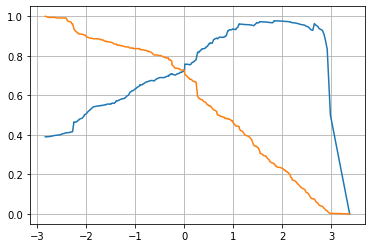

In [92]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show() 

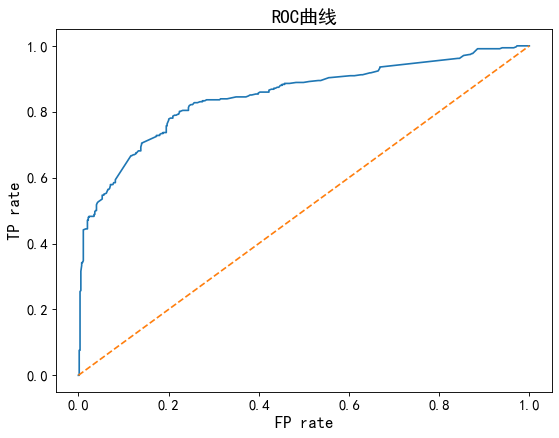

In [94]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题

fprs,tprs,thresholds = roc_curve(y_train,decision_scores)
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)


## statsmodels

In [78]:
glm=sm.GLM(y_train,x_train,family=sm.families.Binomial())
res=glm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.79
Date:                Wed, 19 May 2021   Deviance:                       805.59
Time:                        04:44:31   Pearson chi2:                     929.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1717      0.119     -9.820      0.0